<a href="https://colab.research.google.com/github/Taehwi11/Q1_2022/blob/python/12_04_DTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
air_data=pd.read_csv('airquality.csv')


In [3]:
print(air_data.isnull().sum())
air_data.dropna(axis=0,inplace=True)
air_x=air_data.iloc[:,1:4]
air_y=air_data['Ozone']

Unnamed: 0    0
Ozone         0
Solar.R       0
Wind          0
Temp          0
Month         0
Day           0
dtype: int64


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
scaler_air=MinMaxScaler()
tree_reg=DecisionTreeRegressor(max_depth=5)
full_pipeline_tree_reg=Pipeline(steps=[('scaler',scaler_air),('Regressor',tree_reg)])
full_pipeline_tree_reg.fit(air_x,air_y)
air_pred=full_pipeline_tree_reg.predict(air_x)
print("R_Squared=",full_pipeline_tree_reg.score(air_x,air_y))

R_Squared= 0.9990942357997061


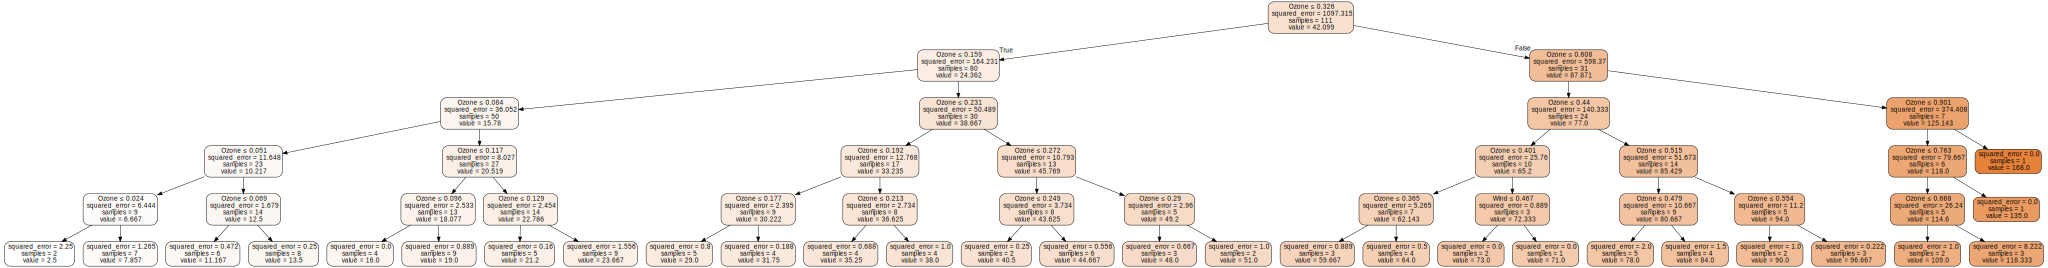

In [8]:
from sklearn import tree
import graphviz
dot_data_2=tree.export_graphviz(tree_reg,out_file=None,feature_names=air_x.columns,class_names='Ozone',filled=True,rounded=True,special_characters=True)
graph2=graphviz.Source(dot_data_2)
graph2